In [49]:
#import estential tool
import rdkit
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
import torch_geometric
from torch_geometric.datasets import MoleculeNet
from torch_geometric.data import Data
import networkx as nx
import seaborn as sb
import sklearn
from sklearn.metrics import mean_squared_error

#for trainning
from torch_geometric.data import DataLoader
import warnings
warnings.filterwarnings("ignore")
import torch
from torch.nn import Linear
from torch.nn import init
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, TopKPooling, global_mean_pool
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

seed_value = 42
torch.manual_seed(seed_value)
np.random.seed(seed_value)
# Download dataset

data = MoleculeNet(root=".", name="ESOL")

# Modeling

In [50]:
# first model
embedding_size = 64
class GCN_first_model(torch.nn.Module):
    def __init__(self):
        torch.manual_seed(seed_value)
        # Init parent
        super(GCN_first_model, self).__init__()

        # define layer
        self.initial_conv = GCNConv(data.num_features, embedding_size)
        self.conv1 = GCNConv(embedding_size, embedding_size)
        self.conv2 = GCNConv(embedding_size, embedding_size)
    
        # define linear layer
        self.out = Linear(embedding_size*2, 1)
    
    def init_weights(self):
        # Use Xavier/Glorot initialization for GCNConv layers
        for layer in [self.initial_conv, self.conv1, self.conv2]:
            if isinstance(layer, GCNConv):
                # layer.reset_parameters()
                if isinstance(layer, GCNConv):
                    init.normal_(layer.lin.weight)
                    if layer.bias is not None:
                        init.zeros_(layer.bias)

        # Initialize weights for the Linear layer
        init.xavier_normal_(self.out.weight)
        if self.out.bias is not None:
            init.zeros_(self.out.bias)

    def forward(self, x, edge_index, batch_index):
        
        # first layer
        hidden = self.initial_conv(x, edge_index)
        hidden = F.relu(hidden)
        # second layer
        hidden = self.conv1(hidden, edge_index)
        hidden = F.relu(hidden)
        # third layer
        hidden = self.conv2(hidden, edge_index)
        hidden = F.relu(hidden)

        # global pooling
        hidden = torch.cat([gmp(hidden, batch_index),
                            gap(hidden, batch_index)], dim=1)
                            

        # apply linear layer
        out = self.out(hidden)
        return out
    

# second model
embedding_size = 32
class GCN_second_model(torch.nn.Module):
    def __init__(self):
        torch.manual_seed(seed_value)
        # Init parent
        super(GCN_second_model, self).__init__()

        # define layer
        self.initial_conv = GCNConv(data.num_features, embedding_size)
        self.conv1 = GCNConv(embedding_size, embedding_size)
        self.conv2 = GCNConv(embedding_size, embedding_size)
    
        # define linear layer
        self.out = Linear(embedding_size*2, 1)

    def init_weights(self):
        # Use Xavier/Glorot initialization for GCNConv layers
        for layer in [self.initial_conv, self.conv1, self.conv2]:
            if isinstance(layer, GCNConv):
                # layer.reset_parameters()
                if isinstance(layer, GCNConv):
                    init.normal_(layer.lin.weight)
                    if layer.bias is not None:
                        init.zeros_(layer.bias)

        # Initialize weights for the Linear layer
        init.xavier_normal_(self.out.weight)
        if self.out.bias is not None:
            init.zeros_(self.out.bias)

    def forward(self, x, edge_index, batch_index):
        
        # first layer
        hidden = self.initial_conv(x, edge_index)
        hidden = F.relu(hidden)
        # second layer
        hidden = self.conv1(hidden, edge_index)
        hidden = F.relu(hidden)
        # third layer
        hidden = self.conv2(hidden, edge_index)
        hidden = F.relu(hidden)

        # global pooling
        hidden = torch.cat([gmp(hidden, batch_index),
                            gap(hidden, batch_index)], dim=1)

        # apply linear layer
        out = self.out(hidden)
        return out

# third model
embedding_size = 128
class GCN_third_model(torch.nn.Module):
    def __init__(self):
        torch.manual_seed(seed_value)
        # Init parent
        super(GCN_third_model, self).__init__()

        # define layer
        self.initial_conv = GCNConv(data.num_features, embedding_size)
        self.conv1 = GCNConv(embedding_size, embedding_size)
        self.conv2 = GCNConv(embedding_size, embedding_size)
    
        # define linear layer
        self.out = Linear(embedding_size*2, 1)

    def init_weights(self):
        # Use Xavier/Glorot initialization for GCNConv layers
        for layer in [self.initial_conv, self.conv1, self.conv2]:
            if isinstance(layer, GCNConv):
                # layer.reset_parameters()
                if isinstance(layer, GCNConv):
                    init.normal_(layer.lin.weight)
                    if layer.bias is not None:
                        init.zeros_(layer.bias)

        # Initialize weights for the Linear layer
        init.xavier_normal_(self.out.weight)
        if self.out.bias is not None:
            init.zeros_(self.out.bias)

    def forward(self, x, edge_index, batch_index):
        
        # first layer
        hidden = self.initial_conv(x, edge_index)
        hidden = F.relu(hidden)
        # second layer
        hidden = self.conv1(hidden, edge_index)
        hidden = F.relu(hidden)
        # third layer
        hidden = self.conv2(hidden, edge_index)
        hidden = F.relu(hidden)

        # global pooling
        hidden = torch.cat([gmp(hidden, batch_index),
                            gap(hidden, batch_index)], dim=1)

        # apply linear layer
        out = self.out(hidden)
        return out

# forth model
embedding_size = 128
class GCN_forth_model(torch.nn.Module):
    def __init__(self):
        torch.manual_seed(seed_value)
        # Init parent
        super(GCN_forth_model, self).__init__()

        # define layer
        self.initial_conv = GCNConv(data.num_features, embedding_size)
        self.conv1 = GCNConv(embedding_size, embedding_size)
        self.conv2 = GCNConv(embedding_size, embedding_size)
        self.conv2 = GCNConv(embedding_size, embedding_size)
    
        # define linear layer
        self.out = Linear(embedding_size*2, 1)

    def init_weights(self):
        # Use Xavier/Glorot initialization for GCNConv layers
        for layer in [self.initial_conv, self.conv1, self.conv2]:
            if isinstance(layer, GCNConv):
                # layer.reset_parameters()
                if isinstance(layer, GCNConv):
                    init.normal_(layer.lin.weight)
                    if layer.bias is not None:
                        init.zeros_(layer.bias)

        # Initialize weights for the Linear layer
        init.xavier_normal_(self.out.weight)
        if self.out.bias is not None:
            init.zeros_(self.out.bias)

    def forward(self, x, edge_index, batch_index):
        
        # first layer
        hidden = self.initial_conv(x, edge_index)
        hidden = F.relu(hidden)
        # second layer
        hidden = self.conv1(hidden, edge_index)
        hidden = F.relu(hidden)
        # third layer
        hidden = self.conv2(hidden, edge_index)
        hidden = F.relu(hidden)

        # global pooling
        hidden = torch.cat([gmp(hidden, batch_index),
                            gap(hidden, batch_index)], dim=1)

        # apply linear layer
        out = self.out(hidden)
        return out
    

class EarlyStopping:
    def __init__(self, tolerance=5, min_delta=0):
        self.tolerance = tolerance
        self.min_delta = min_delta
        self.counter = 0
        self.early_stop = False
        self.best_validation_loss = float('inf')

    def __call__(self, train_loss, validation_loss):
        if train_loss > (self.best_validation_loss - self.min_delta):
            self.counter = 0
            self.best_validation_loss = validation_loss

        elif  self.best_validation_loss - self.min_delta > train_loss  :
            self.best_validation_loss = validation_loss
            self.counter += 1
            print(f'case valid better case {self.counter}')
            if self.counter >= self.tolerance:
                self.early_stop = True

        else : 
            print('something wrong')


# Setup

In [11]:
# setup dataset
data_size = len(data)
NUM_GRAPHS_PER_BATCH = 32
training_set = DataLoader(data[:int(data_size * 0.7)],
                    batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
test_set = DataLoader(data[int(data_size * 0.7):int(data_size * 0.85)],
                         batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
validation_set = DataLoader(data[int(data_size * 0.85):],
                         batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)



In [53]:
# training function
def train(model,optimizer,loss_fn,epochs:int=1000, is_early_stop:bool = True,show_result_at:int = 0):
    earlystop = EarlyStopping(tolerance=7,min_delta=1)
    train_losses_epoch = []
    valid_losses_epoch = []
    stop_at_epoch = epochs
    for epoch in range(epochs):
        model = model.to(device)
        train_losses = []
        valid_losses = []

        #train step
        for batch in training_set:
            # Use GPU
            batch.to(device)
            # Reset gradients
            optimizer.zero_grad()
            # Passing the node features and the connection info
            pred  = model(batch.x.float(), batch.edge_index, batch.batch)
            # Calculating the loss and gradients
            train_loss = loss_fn(pred, batch.y)
            train_loss.backward()
            float_train_loss = float(train_loss.detach().numpy().astype(float))
            train_losses.append(float_train_loss)
            # Update using the gradients
            optimizer.step()
        
        #valid step
        model.eval()
        for batch in validation_set:
            # Use GPU
            batch.to(device)
            # Passing the node features and the connection info
            pred = model(batch.x.float(), batch.edge_index, batch.batch)
            # Calculating the loss
            valid_loss = loss_fn(pred, batch.y)
            float_valid_loss = float(valid_loss.detach().numpy().astype(float))
            valid_losses.append(float_valid_loss)
        
        #calculate average loss
        average_train_loss = sum(train_losses)/len(train_losses)
        average_valid_loss = sum(valid_losses)/len(valid_losses)
        train_losses_epoch.append(average_train_loss)
        valid_losses_epoch.append(average_valid_loss)
        if (show_result_at != 0) and ((epoch+1)/show_result_at == 0 ): print(f"at epoch : {epoch} train_loss = {average_train_loss}  valid_loss = {average_valid_loss}")
        if (is_early_stop):earlystop(train_loss=average_train_loss, validation_loss=average_valid_loss)
        if earlystop.early_stop and is_early_stop:
            stop_at_epoch = epoch+1
            print(f'result at {epoch+1} is {earlystop.early_stop}')
            break
    # test_result = test(model,loss_fn=loss_fn)
    return train_losses_epoch, valid_losses_epoch, stop_at_epoch

def test(model,loss_fn):
    test_loss_list = []
    for batch in test_set:
        batch.to(device)
        # Passing the node features and the connection info
        pred = model(batch.x.float(), batch.edge_index, batch.batch)
        # Calculating the loss
        test_loss = loss_fn(pred, batch.y)
        float_test_loss = float(test_loss.detach().numpy().astype(float))
        test_loss_list.append(float_test_loss)
    average_train_loss = sum(test_loss_list)/len(test_loss_list)
    return average_train_loss

# def grid_search(model, loss_fn, epoch_list, embed_node_list, embed_classifire_layer):



In [54]:
# setup 
loss_fn = torch.nn.MSELoss()

#first model
first_model = GCN_first_model()
PATH_first_model_init = "Save_weight/init_weight/first_model.pth"
# first_model.init_weights()
# torch.save(first_model.state_dict(), PATH_first_model_init)
first_model.load_state_dict(torch.load(PATH_first_model_init))
optimizer_first = torch.optim.Adam(first_model.parameters(), lr=0.0007)

#second model
second_model = GCN_second_model()
PATH_second_model_init = "Save_weight/init_weight/second_model.pth"
# second_model.init_weights()
# torch.save(second_model.state_dict(), PATH_second_model_init)
second_model.load_state_dict(torch.load(PATH_second_model_init))
optimizer_second = torch.optim.Adam(second_model.parameters(), lr=0.0007)

#second model
third_model = GCN_third_model()
PATH_third_model_init = "Save_weight/init_weight/third_model.pth"
# third_model.init_weights()
# torch.save(third_model.state_dict(), PATH_third_model_init)
third_model.load_state_dict(torch.load(PATH_third_model_init))
optimizer_third = torch.optim.Adam(third_model.parameters(), lr=0.0007)

In [ ]:
# first_model trainning
first_model = GCN_first_model()
first_model.load_state_dict(torch.load(PATH_first_model_init))
optimizer_first = torch.optim.Adam(first_model.parameters(), lr=0.0007)
loss_train_track_first, loss_valid_track_first, stop_at_epoch_first = train(model=first_model, optimizer=optimizer_first, loss_fn=loss_fn,epochs=5000,is_early_stop=False,show_result_at=100)

In [47]:
# second_model trainning
second_model = GCN_second_model()
second_model.load_state_dict(torch.load(PATH_second_model_init))
optimizer_second = torch.optim.Adam(second_model.parameters(), lr=0.0007)
loss_train_track_second, loss_valid_track_second, stop_at_epoch_second = train(model=second_model, optimizer=optimizer_second, loss_fn=loss_fn,epochs=5000,is_early_stop=False,show_result_at=100)

[253.21293131510416, 219.31498962402344, 146.00571568806967]

In [ ]:
# thrid_model trainning
third_model = GCN_third_model()
third_model.load_state_dict(torch.load(PATH_third_model_init))
optimizer_third = torch.optim.Adam(third_model.parameters(), lr=0.0007)
loss_train_track_third, loss_valid_track_third, stop_at_epoch_third = train(model=third_model, optimizer=optimizer_third, loss_fn=loss_fn,epochs=5000,is_early_stop=False,show_result_at=100)

In [52]:
# first_model = GCN_first_model()
# first_model.load_state_dict(torch.load(PATH_first_model_init))
# optimizer_first = torch.optim.Adam(first_model.parameters(), lr=0.0007)
# _, _, _, list = train(model=first_model, optimizer=optimizer_first, loss_fn=loss_fn,epochs=10,is_early_stop=False)
# list

case valid better case 1
case valid better case 2
case valid better case 3
case valid better case 1


[253.21293131510416, 219.31498962402344, 146.00571568806967]

In [ ]:
list_2 = []
first_model.init_weights()
for name, param in first_model.named_parameters():
    # print(f"name : {name} param : {param} ")
    list_2.append(param)

In [13]:
first_model.init_weights()
optimizer_first = torch.optim.Adam(first_model.parameters(), lr=0.0007)
_,_,_,list = train(model=first_model, optimizer=optimizer_first, loss_fn=loss_fn,epochs=100,is_early_stop=False)
list

case valid better case 1


[1.5006280740102131, 1.0781973338127135, 1.8141082723935444]

In [14]:
first_model.init_weights()
optimizer_first = torch.optim.Adam(first_model.parameters(), lr=0.0007)
_,_,_,list = train(model=first_model, optimizer=optimizer_first, loss_fn=loss_fn,epochs=10,is_early_stop=False)
list

case valid better case 1


[3.0168838103612265, 3.218268640041351, 3.2252490123113]

In [62]:
first_model.parameters

<bound method Module.parameters of GCN_first_model(
  (initial_conv): GCNConv(9, 128)
  (conv1): GCNConv(128, 128)
  (conv2): GCNConv(128, 128)
  (out): Linear(in_features=256, out_features=1, bias=True)
)>

In [42]:
_,_,_,list = train(model=first_model, optimizer=optimizer_first, loss_fn=loss_fn,epochs=10,is_early_stop=False)
list

case valid better case 1


[2.3387096722920737, 2.628441820144653, 2.4764813979466758]

In [ ]:
train_losses, valid_losses, stop_at_epoch, test_result = train(model=first_model,optimizer=optimizer_first,loss_fn=loss_fn,is_early_stop=False)

In [59]:
test_result

0.7804011205832163

In [53]:
# train_lossed_list = [float(i.detach().numpy().astype(float)) for i in train_losses]
# valid_lossed_list = [float(i.detach().numpy().astype(float)) for i in valid_losses]

In [66]:
float(train_losses)

13.481454849243164

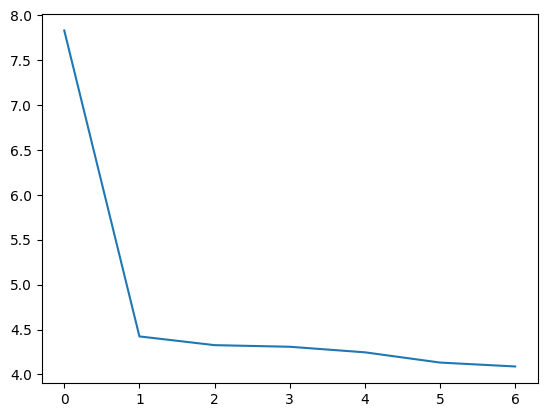

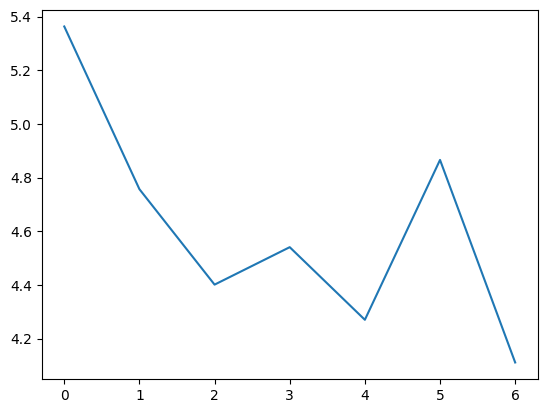

7

In [11]:
plt.figure()
plt.plot(train_losses)
plt.show()
plt.figure()
plt.plot(valid_losses)
plt.show()
stop_at_epoch


In [40]:
# # Root mean squared error
# loss_fn = torch.nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)

# # Use GPU for training
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# model = model.to(device)

# # Wrap data in a data loader
# data_size = len(data)
# NUM_GRAPHS_PER_BATCH = 32
# loader = DataLoader(data[:int(data_size * 0.8)],
#                     batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
# test_loader = DataLoader(data[int(data_size * 0.8):],
#                          batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)

# def train(data):
#     # Enumerate over the data
#     for batch in loader:
#       # Use GPU
#       batch.to(device)
#       # Reset gradients
#       optimizer.zero_grad()
#       # Passing the node features and the connection info
#       pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)
#       # Calculating the loss and gradients
#       loss = loss_fn(pred, batch.y)
#       loss.backward()
#       # Update using the gradients
#       optimizer.step()
#     return loss, embedding

# print("Starting training...")
# losses = []
# for epoch in range(1000):
#     loss, h = train(data)
#     losses.append(loss)
#     if epoch % 100 == 0:
#       print(f"Epoch {epoch} | Train Loss {loss} ")

Starting training...
Epoch 0 | Train Loss 4.54939603805542
Epoch 100 | Train Loss 1.5579652786254883
Epoch 200 | Train Loss 2.6277196407318115
Epoch 300 | Train Loss 0.37277689576148987
Epoch 400 | Train Loss 0.47624853253364563
Epoch 500 | Train Loss 0.7442011833190918
Epoch 600 | Train Loss 0.5013490319252014
Epoch 700 | Train Loss 0.3040367066860199
Epoch 800 | Train Loss 0.1414112150669098
Epoch 900 | Train Loss 0.5435447096824646


In [56]:
model = Linear(32,2)
model.weight
gcn= GCNConv(32,4)
gcn.lin.weight

Parameter containing:
tensor([[-0.2163,  0.3716, -0.3634, -0.0903, -0.1168, -0.1323, -0.3531,  0.1559,
          0.1392, -0.3554, -0.2455, -0.3763, -0.3087, -0.2272,  0.0542,  0.1501,
          0.1481,  0.3839, -0.2121, -0.3209,  0.0911,  0.3769, -0.2624, -0.1133,
         -0.0098,  0.3249,  0.2947, -0.2368,  0.3414, -0.3013, -0.3402, -0.0492],
        [-0.1231, -0.1866,  0.0688, -0.3938, -0.0099,  0.3559, -0.0030,  0.0825,
          0.2652,  0.3720,  0.1544, -0.0672, -0.1796,  0.2722, -0.1045,  0.1865,
         -0.0310,  0.3409, -0.0856,  0.1352,  0.0005,  0.2392, -0.3322,  0.3229,
         -0.2801,  0.3161,  0.0925, -0.1436,  0.2787, -0.1840,  0.2880, -0.3976],
        [ 0.2899, -0.3620, -0.1849,  0.1175,  0.1006, -0.2950, -0.3980,  0.1271,
         -0.2695, -0.3894,  0.3320,  0.1711,  0.0165, -0.3711, -0.1319,  0.1900,
         -0.0454,  0.2874,  0.2556, -0.2383,  0.4016, -0.3495,  0.3401, -0.0136,
         -0.3479,  0.1466,  0.0649,  0.1146, -0.0665,  0.1301, -0.0437, -0.4033],
   

In [51]:
# import pandas as pd

# # Analyze the results for one batch
# test_batch = next(iter(test_loader))
# with torch.no_grad():
#     test_batch.to(device)
#     pred, embed = model(test_batch.x.float(), test_batch.edge_index, test_batch.batch)
#     df = pd.DataFrame()
#     df["y_real"] = test_batch.y.tolist()
#     df["y_pred"] = pred.tolist()
# df["y_real"] = df["y_real"].apply(lambda row: row[0])
# df["y_pred"] = df["y_pred"].apply(lambda row: row[0])
# df

[(-7.0, 2.0)]

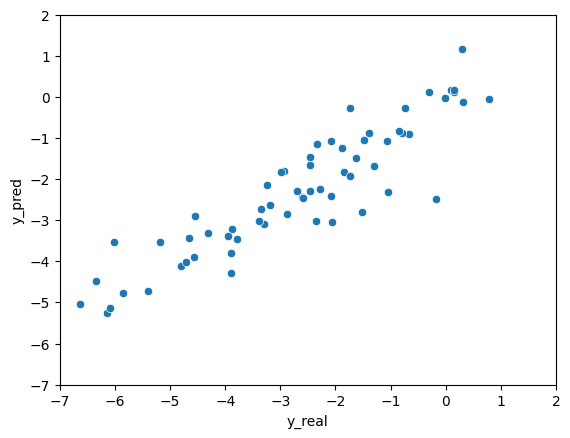

In [47]:
# plt = sb.scatterplot(data=df, x="y_real", y="y_pred")
# plt.set(xlim=(-7, 2))
# plt.set(ylim=(-7, 2))


In [53]:
# sklearn.metrics.mean_squared_error(df['y_real'], df['y_pred'])

0.8329761435263996